In [2]:
from Bio import SeqIO
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import os

In [47]:
my_seq = SeqIO.parse('../Datasets/Original_Sequence_Chr4.fa', "fasta")

seq_arr = []

for index, chrs in enumerate(my_seq):
    for chr_letters in chrs.seq:
        seq_arr.append(chr_letters)

print(len(seq_arr))

filtered_seq = []

for letters in seq_arr:
        filtered_seq.append(letters)

synuclein_alpha_arr = filtered_seq[89724098:89838303]

def group_characters(text, group_size=70):
    return [text[i:i+group_size] for i in range(0, len(text), group_size)]

synuclein_alpha = group_characters("".join(synuclein_alpha_arr))

checkSeq = open("../Datasets/Filtered_Sequence.txt", "w")
checkSeq.write("\n".join(synuclein_alpha))
checkSeq.close()

190214555


In [5]:
print(str(synuclein_alpha_arr))
encoding_seq = "".join(synuclein_alpha_arr)
print(encoding_seq)

['T', 'A', 'T', 'T', 'T', 'T', 'C', 'A', 'T', 'A', 'T', 'A', 'T', 'G', 'T', 'A', 'T', 'A', 'T', 'A', 'T', 'T', 'T', 'A', 'T', 'T', 'A', 'T', 'G', 'T', 'C', 'A', 'C', 'A', 'A', 'A', 'T', 'A', 'G', 'C', 'T', 'A', 'C', 'A', 'T', 'A', 'C', 'T', 'G', 'G', 'A', 'T', 'A', 'A', 'G', 'C', 'C', 'A', 'G', 'A', 'A', 'A', 'G', 'A', 'T', 'G', 'A', 'G', 'G', 'A', 'A', 'A', 'C', 'A', 'T', 'G', 'T', 'T', 'T', 'G', 'C', 'A', 'T', 'C', 'T', 'C', 'A', 'C', 'A', 'C', 'T', 'A', 'G', 'T', 'G', 'C', 'A', 'G', 'A', 'G', 'A', 'T', 'T', 'C', 'T', 'G', 'A', 'A', 'A', 'A', 'A', 'G', 'A', 'C', 'C', 'C', 'C', 'A', 'C', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'A', 'C', 'C', 'A', 'A', 'A', 'C', 'C', 'A', 'C', 'A', 'C', 'A', 'T', 'T', 'A', 'G', 'A', 'T', 'T', 'G', 'T', 'T', 'C', 'T', 'G', 'T', 'T', 'C', 'C', 'C', 'A', 'A', 'T', 'T', 'G', 'T', 'G', 'T', 'G', 'C', 'C', 'A', 'A', 'A', 'G', 'T', 'G', 'C', 'A', 'C', 'T', 'C', 'T', 'G', 'A', 'A', 'C', 'T', 'G', 'T', 'T', 'T', 'T', 'G', 'G', 'T', 'A', 'A', 'A', 'G', 'C', 'C', 'G',

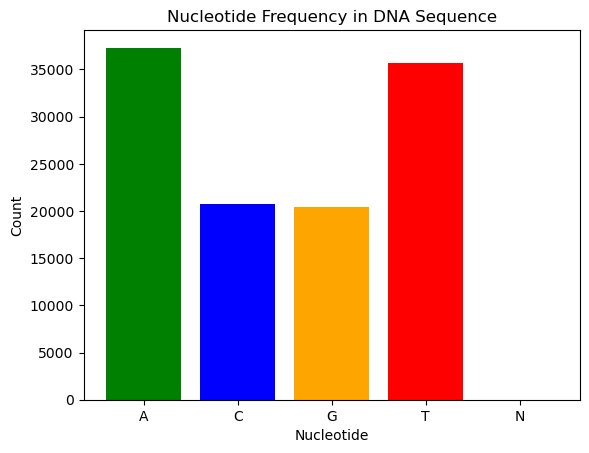

In [6]:
def count_nucleotides(sequence):
    sequence = sequence.upper().replace(" ", "").strip()
    
    counts = {
        "A": sequence.count("A"),
        "C": sequence.count("C"),
        "G": sequence.count("G"),
        "T": sequence.count("T"),
        "N": sequence.count("N")  # 'N' may represent any nucleotide
    }
    
    return counts

# Function to plot histogram
def plot_nucleotide_histogram(counts, title="Nucleotide Frequency in DNA Sequence"):
    labels = list(counts.keys())
    values = list(counts.values())

    plt.bar(labels, values, color=['green', 'blue', 'orange', 'red', 'purple'])
    plt.xlabel("Nucleotide")
    plt.ylabel("Count")
    plt.title(title)
    plt.show()

count = count_nucleotides(str(synuclein_alpha))
plot_nucleotide_histogram(count)

In [7]:
def is_valid_sequence(seq):
    if seq is None or seq == '' or ' ' in seq:
        return "Invalid Sequence: None, empty or string contains whitespaces"
    return "Valid Sequence"

invalid_seq = None
empty_seq = ""
sequence_with_spaces = "AGTC AAGT CCG" 

print(is_valid_sequence(invalid_seq))        
print(is_valid_sequence(empty_seq))           
print(is_valid_sequence(sequence_with_spaces))
print(is_valid_sequence(synuclein_alpha)) 

Invalid Sequence: None, empty or string contains whitespaces
Invalid Sequence: None, empty or string contains whitespaces
Invalid Sequence: None, empty or string contains whitespaces
Valid Sequence


In [8]:
def trim_whitespace(seq):
    return "Filtered Sequence: " + seq.replace(" ", "")

print(trim_whitespace(sequence_with_spaces))
print(trim_whitespace(str(synuclein_alpha)))

Filtered Sequence: AGTCAAGTCCG
Filtered Sequence: ['TATTTTCATATATGTATATATTTATTATGTCACAAATAGCTACATACTGGATAAGCCAGAAAGATGAGGA','AACATGTTTGCATCTCACACTAGTGCAGAGATTCTGAAAAAGACCCCACTTGGAATACCAAACCACACAT','TAGATTGTTCTGTTCCCAATTGTGTGCCAAAGTGCACTCTGAACTGTTTTGGTAAAGCCGACCGTGGAGT','CATATGAGGCTGAATAACTTGGGAGAATGTAAGTCTGCAAAATAAACCTAGGACTGGATTGATCCTCAGG','CCACTTGGCAGGTGAATGTCTCGGGAGTGAATATGAGACAAGCTTCCTGAAAAGGCTTATATGACTTAAA','GAACTTTTTGTTTAAGTGTTTGGTCCCAAATAAACTATTAAGATATATAAAGTAATTCACTGCTCAAAAA','TTACCGTCAGATAAATATTAAGGGAAGAAACACTTTAAAGGAGAATTTGTATCCACATAAATCCTTAAAT','TCATGGTCACAACTTTCCTAATCTCAAATTGTTCTAGGTCACTGCTATCAGTCTAGTTCTGTCCTCTATT','TCTTAATTTAATACCAATACTTTTAAATTTTTAAAATATGCTGCTTTAGGTAGATTTAAAATATATCCTA','ACCGCCACTTTCTAACCTTCCTGAAATATACTGTTCAATAACAAATCCTTTCCTTGCTTAAACATAACTT','AAATAAAACAAGAAACTTACCATTTCTCTCTAGTGTAAGATGACACATGCAGCTTAGCACTCTGTAGTAG','TCTCTCTTCAATTAGGTAAAAAAGGAAGTTTCTATGGTAACCATCCTTATAGTCACTCATTCCTCCTTCC','TTCCTCACCAGCGCCCAATATATATCACATTACTCATGAATACATATAAACTGCTAGCATGTCTAGAATA',

In [9]:
def is_valid_alphabetic_sequence(seq):    
    pattern = re.compile(r'^[ACGTN]+$')
    
    if bool(pattern.match(seq)):
        return "Valid Sequence"
    else:
        return "Invalid Sequence: Contains futile characters"

invalid_seq = "AGT123"
invalid_seq2 = "AGT*%$"
invalid_seq3 = "$%#457"
invalid_seq4 = "grpproj"
invalid_seq5 = "HelloWorld"

print(is_valid_alphabetic_sequence(invalid_seq))
print(is_valid_alphabetic_sequence(invalid_seq2))
print(is_valid_alphabetic_sequence(invalid_seq3))
print(is_valid_alphabetic_sequence(invalid_seq4))
print(is_valid_alphabetic_sequence(invalid_seq5))
print(is_valid_alphabetic_sequence("".join(synuclein_alpha)))

Invalid Sequence: Contains futile characters
Invalid Sequence: Contains futile characters
Invalid Sequence: Contains futile characters
Invalid Sequence: Contains futile characters
Invalid Sequence: Contains futile characters
Valid Sequence


In [10]:
# Assuming 'label_encoder' is defined as below:
nucleotides = ['A', 'C', 'G', 'T', 'N']
label_encoder = LabelEncoder()
label_encoder.fit(nucleotides)

def binary_encoder(my_array):
    """Convert nucleotides to binary encoding (one-hot encoding)."""
    # Transform the input array to integer labels
    integer_encoded = label_encoder.transform(my_array)
    
    # Initialize a binary matrix with shape (n_samples, n_classes)
    binary_encoded = np.zeros((len(my_array), len(nucleotides)), dtype=int)
    
    # Use one-hot encoding
    for i, label in enumerate(integer_encoded):
        binary_encoded[i, label] = 1
    
    return binary_encoded

# Example test sequence
seq_test = 'TTCAGCCAGTG'
# Convert string to array for encoding
def string_to_array(sequence):
    return np.array(list(sequence))

# Test the binary encoder
binary_encoded_output = binary_encoder(string_to_array(seq_test))
print(binary_encoded_output)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]]


---

**Example encoding and class assignment**

In [15]:
# Convert nucleotides to binary representation
def nucleotide_to_binary(sequence):
    mapping = {'A': '00', 'C': '01', 'G': '10', 'T': '11'}
    binary_sequence = ''.join([mapping[nt] for nt in sequence])
    return binary_sequence

# Split sequence into smaller 4-nucleotide (8-bit) segments
def split_sequence(sequence, segment_length=4):
    return [sequence[i:i+segment_length] for i in range(0, len(sequence), segment_length)]

# Function to create class labels
def generate_class_label(sequence):
    if all(nt == 'A' for nt in sequence):  # Fully matched example
        return 0
    elif 'G' in sequence or 'C' in sequence:  # Mismatch example
        return 2
    else:  # Partially matched example
        return 1

# Main function to create a balanced dataset
def create_dataset_from_sequence(dna_sequence, segment_length=4):
    binary_sequence = nucleotide_to_binary(dna_sequence)
    segments = split_sequence(dna_sequence, segment_length)
    X = [list(nucleotide_to_binary(segment)) for segment in segments if len(segment) == segment_length]
    y = [generate_class_label(segment) for segment in segments if len(segment) == segment_length]
    return np.array(X), np.array(y)

dna_sequence = encoding_seq

# Generate dataset
X, y = create_dataset_from_sequence(dna_sequence)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the generated dataset
print("Sample data (features):", X_train[:])
print("Sample labels:", y_train[:])

Sample data (features): [['1' '1' '1' ... '0' '0' '0']
 ['1' '1' '1' ... '1' '0' '0']
 ['1' '1' '0' ... '0' '1' '0']
 ...
 ['1' '1' '1' ... '0' '0' '0']
 ['0' '1' '0' ... '0' '1' '1']
 ['1' '1' '1' ... '1' '1' '0']]
Sample labels: [1 2 2 ... 2 2 2]
